## Importing modules

In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Extracting features from CSV file

In [4]:
full_df = pd.read_csv('./FINAL_metal_halide_full_moments.csv')

In [5]:
full_df.head()

,cation,anion,crystal structure,TEMP(k),metal radius (A),halide radius (A),Rm/Rx,geo mean of R,pol mean,pol variance,...,cov peak mean,ion peak mean,cov peak var,ion peak var,cov peak skew,ion peak skew,cov peak kurt,ion peak kurt,Diffusion coeff,Ea (eV)
0,Ag,I,alpha,500,1.29,2.06,0.626214,1.630153,0.626320,0.014724,...,14.353943,51.525984,77.318052,95.781126,0.550822,0.320219,-0.664879,-0.611733,0.000028,0.136
1,Ag,I,alpha,700,1.29,2.06,0.626214,1.630153,0.643294,0.013964,...,15.406421,51.428804,79.948046,102.417778,0.457695,0.353750,-0.828575,-0.644303,0.000046,0.136
2,Ag,I,alpha,800,1.29,2.06,0.626214,1.630153,0.618987,0.014774,...,14.694143,51.149662,79.303605,98.700389,0.548186,0.382403,-0.709003,-0.555263,0.000050,0.136
3,Ag,I,alpha,900,1.29,2.06,0.626214,1.630153,0.641665,0.013068,...,15.759974,51.876516,82.356243,110.609221,0.399547,0.320073,-0.896452,-0.715895,0.000078,0.136
4,Ag,I,beta,400,1.29,2.06,0.626214,1.630153,0.449170,0.011715,...,6.688690,59.832029,19.906934,99.558364,1.754838,-0.632917,4.970205,-0.107479,0.000002,0.389


In [6]:
sample_size = len(full_df)
print(sample_size)

56


In [7]:
full_df['crystal structure'].unique()

array(['alpha', 'beta', 'rock salt', 'zb'], dtype=object)

### Key for feature assignment
**Cations:** Ag = 0, Cu = 1

**Anions:** Br = 0, Cl = 1, I = 2

**Crystal Structure:** alpha = 0, beta = 1, rock salt = 2, zb = 3

In [8]:
converted_df = full_df.copy()
converted_df['cation'] = full_df['cation'].replace({'Ag':0,'Cu':1})
converted_df['anion'] = full_df['anion'].replace({'Br':0,'Cl':1,'I':2})
converted_df['crystal structure'] = full_df['crystal structure'].replace({'alpha':0,'beta':1,'rock salt':2,'zb':3})

In [9]:
converted_df.head()

,cation,anion,crystal structure,TEMP(k),metal radius (A),halide radius (A),Rm/Rx,geo mean of R,pol mean,pol variance,...,cov peak mean,ion peak mean,cov peak var,ion peak var,cov peak skew,ion peak skew,cov peak kurt,ion peak kurt,Diffusion coeff,Ea (eV)
0,0,2,0,500,1.29,2.06,0.626214,1.630153,0.626320,0.014724,...,14.353943,51.525984,77.318052,95.781126,0.550822,0.320219,-0.664879,-0.611733,0.000028,0.136
1,0,2,0,700,1.29,2.06,0.626214,1.630153,0.643294,0.013964,...,15.406421,51.428804,79.948046,102.417778,0.457695,0.353750,-0.828575,-0.644303,0.000046,0.136
2,0,2,0,800,1.29,2.06,0.626214,1.630153,0.618987,0.014774,...,14.694143,51.149662,79.303605,98.700389,0.548186,0.382403,-0.709003,-0.555263,0.000050,0.136
3,0,2,0,900,1.29,2.06,0.626214,1.630153,0.641665,0.013068,...,15.759974,51.876516,82.356243,110.609221,0.399547,0.320073,-0.896452,-0.715895,0.000078,0.136
4,0,2,1,400,1.29,2.06,0.626214,1.630153,0.449170,0.011715,...,6.688690,59.832029,19.906934,99.558364,1.754838,-0.632917,4.970205,-0.107479,0.000002,0.389


In [10]:
converted_df.columns

Index(['cation', 'anion', 'crystal structure', 'TEMP(k)', 'metal radius (A)',
       'halide radius (A)', 'Rm/Rx', 'geo mean of R', 'pol mean',
       'pol variance', 'pol skewness', 'pol kurtosis', 'cov peak mean',
       'ion peak mean', 'cov peak var', 'ion peak var', 'cov peak skew',
       'ion peak skew', 'cov peak kurt', 'ion peak kurt', 'Diffusion coeff',
       'Ea (eV)'],
      dtype='object')

In [11]:
#getting rid of the correlated features
correl_df = converted_df.drop(columns = ['metal radius (A)',
       'halide radius (A)', 'Rm/Rx', 'geo mean of R'])

#separating features and target
main_features_D = correl_df.iloc[:,:-2]
main_target_D = correl_df['Diffusion coeff']
print(main_features_D.head())

   cation  anion  crystal structure  TEMP(k)  pol mean  pol variance  \
0       0      2                  0      500  0.626320      0.014724   
1       0      2                  0      700  0.643294      0.013964   
2       0      2                  0      800  0.618987      0.014774   
3       0      2                  0      900  0.641665      0.013068   
4       0      2                  1      400  0.449170      0.011715   

   pol skewness  pol kurtosis  cov peak mean  ion peak mean  cov peak var  \
0     -0.619985      0.183131      14.353943      51.525984     77.318052   
1     -0.573709     -0.018389      15.406421      51.428804     79.948046   
2     -0.569857      0.066197      14.694143      51.149662     79.303605   
3     -0.492481     -0.064092      15.759974      51.876516     82.356243   
4      0.164496     -0.258401       6.688690      59.832029     19.906934   

   ion peak var  cov peak skew  ion peak skew  cov peak kurt  ion peak kurt  
0     95.781126       0.55

## Machine learning model using permutation importance

**Here is an example from [scikit learn site](https://scikit-learn.org/stable/modules/permutation_importance.html) that talks about permutation importance.**

**This [github](https://christophm.github.io/interpretable-ml-book/feature-importance.html#theory-3) explains the theory behind permutation importance.**

_We measure the importance of a feature by calculating the increase in the model’s prediction error after permuting the feature. A feature is “important” if shuffling its values increases the model error, because in this case the model relied on the feature for the prediction. A feature is “unimportant” if shuffling its values leaves the model error unchanged, because in this case the model ignored the feature for the prediction._

**This [website](https://www.geeksforgeeks.org/ml-models-score-and-error/) tells you the difference between model score and model error**

**This [website](https://scikit-learn.org/stable/modules/cross_validation.html) talks about cross validation, to return the accuracy score**

**This [website](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge.score) talks about methods for the `Ridge` function. `LinearRegression()` was better to use**

Dataset was loaded from the library, but I will use my own as a model

```python
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

#splitting the training and test datasets
X_train, X_val, y_train, y_val = train_test_split(
     diabetes.data, diabetes.target, random_state=0)

#creating the model (Ridge is a form of linear regression)
model = Ridge(alpha=1e-2).fit(X_train, y_train)
model.score(X_val, y_val) #R^2 value of model.predict() with respect to y_val

#shuffling the model features and targets
r = permutation_importance(model, X_val, y_val,
                           n_repeats=30,
                           random_state=0)

#print the results in order of significance
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{diabetes.feature_names[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

s5      0.204 +/- 0.050
bmi     0.176 +/- 0.048
bp      0.088 +/- 0.033
sex     0.056 +/- 0.023
```

```python
#function to calculate the permutation importance; condensed the code above into a function
def perm_importance(dataset,features,target, fig_size =(20,4), rand_state = 0, t_size=0.25, col = 'steelblue'):
    mean_list = []
    feat_list = []
    
    #splitting the training and test datasets
    x_train, x_val, y_train, y_val = train_test_split(features,target,
                                                      random_state = rand_state, test_size = t_size)
    #creating the model (Linear Regression)
    model_diff = LinearRegression().fit(x_train,y_train)
    mod_score = model_diff.score(x_val, y_val) #(x_val, y_val)
    print('model score:',mod_score)
    
    #shuffling the model features and targets
    r = permutation_importance(model_diff, x_val, y_val,
                               n_repeats=30,random_state=rand_state)
    
    #printing each feature with their mean importance and stdev
    for i in r.importances_mean.argsort()[::-1]:
        print(f"{dataset.columns[i]} \t \t "
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")
        mean_list.append(r.importances_mean[i])
        feat_list.append(dataset.columns[i])

    #bar plot to show importance
    plt.figure(figsize = (20,4))
    plt.bar(x= feat_list,height=mean_list,label = feat_list, color = col)
    plt.xlabel('feature', fontsize=14)
    plt.ylabel('importance mean', fontsize = 14)
    plt.tight_layout()
    plt.show()
    return
```

In [12]:
#function to calculate the permutation importance; condensed the code above into a function
def perm_importance(dataset,features,target, fig_size =(20,4), rand_state = 0, t_size=0.25, col = 'steelblue'):
    mean_list = []
    feat_list = []
    
    # test size is either a decimal representing % or an integer representing the number of samples
    x_train, x_val, y_train, y_val = train_test_split(features,target,
                                                      random_state = rand_state, test_size = t_size)
    model_diff = LinearRegression().fit(x_train,y_train)
    mod_score = model_diff.score(x_val, y_val) #(x_val, y_val)
    print('model score (as $R^2$):',mod_score)
    
    #finding the importance of each feature
    r = permutation_importance(model_diff, x_val, y_val,
                               n_repeats=30,random_state=42)
    
    #printing each feature with their mean importance and stdev
    for i in r.importances_mean.argsort()[::-1]:
        print(f"{dataset.columns[i]} \t \t "
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")
        mean_list.append(r.importances_mean[i])
        feat_list.append(dataset.columns[i])
        
    #altering feat_list format so that the fontsize can fit better
    for i,feature in enumerate(feat_list):
        feat_list[i] = '\n'.join(feature.split(' '))

    #figure to plot importance
    plt.figure(figsize = fig_size)
    plt.bar(x= feat_list,height=mean_list,label = feat_list, color = col)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('\nFeature', fontsize=24)
    plt.ylabel('Importance Mean\n', fontsize = 24)
    #plt.legend()
    #sns.despine()
    #plt.tight_layout()
    plt.show()
    return

## Machine learning model that creates a decision tree

Website with code: https://towardsdatascience.com/feature-importance-in-decision-trees-e9450120b445

Website to create figure: https://mljar.com/blog/visualize-decision-tree/

Raw code:

```python
# Train test spliting 
from sklearn.model_selection import train_test_split

# Importing the sklearn implementation 
from sklearn.tree import DecisionTreeRegressor

# Precision metrics 
from sklearn.metrics import mean_absolute_error

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Defining the hyper parameters 
hps = {
    'max_depth': 3,
    'min_samples_split': 4
}

# Loading the tree object 
tree = DecisionTreeRegressor(**hps)

# Fitting on the training data 
tree.fit(X_train, y_train)

# Predicting the test set
y_pred = tree.predict(X_test)

# Calculating the mean absolute error 
mae_train = mean_absolute_error(y_train, tree.predict(X_train)).round(2)
mae_test = mean_absolute_error(y_test, y_pred).round(2)

print(f"Mean absolute error on training set: {mae_train}")
print(f"Mean absolute error on test set: {mae_test}")
```

In [13]:
# function to create decision tree
def des_tree(dataset,features,target, title_name='Diffusion Coefficient Decision Tree', fig_size = (35,25),
             font_size = 14,max_depth = 4, prec=8):

    # Spliting the data into training and testing sets
    x_train, x_test, y_train, y_test =  train_test_split(features,target,random_state = 0)

    # Defining the hyper parameters 
    hps = {
        'max_depth': max_depth,
        'min_samples_split': 4
    }

    # Loading the tree object 
    tree = DecisionTreeRegressor(**hps)

    # Fitting on the training data 
    tree.fit(x_train, y_train)

    # Predicting the test set
    y_pred = tree.predict(x_test)

    # Calculating the mean absolute error 
    mae_train = mean_absolute_error(y_train, tree.predict(x_train)).round(2)
    mae_test = mean_absolute_error(y_test, y_pred).round(2)
    print(f"Mean absolute error on training set: {mae_train}")
    print(f"Mean absolute error on test set: {mae_test}")
    
    #figure of decision tree for visualizing the plot 
    num_of_feat = len(features.columns) 
    print('Number of features detected:',num_of_feat)
    fig = plt.figure(figsize=fig_size)
    plot_tree(tree, feature_names = dataset.columns[:num_of_feat],
                   filled=True, precision = prec, fontsize = font_size) #precision = sig figs for "Value" in tree
    plt.suptitle(title_name, fontsize = 30)
    #plot_tree(tree,feature_names = dataset.columns[:num_of_feat])
    return plt.show()

## Running ML algorithm for diffusion and Ea

	 	 	 THIS HAS CORRELATED FEATURES FOR DIFFUSION REMOVED 

model score (as $R^2$): 0.6450804105540777
ion peak mean 	 	 2.772 +/- 0.832
ion peak var 	 	 2.366 +/- 0.696
pol skewness 	 	 1.032 +/- 0.402
TEMP(k) 	 	 0.786 +/- 0.283
pol kurtosis 	 	 0.529 +/- 0.221
pol variance 	 	 0.424 +/- 0.164
ion peak skew 	 	 0.351 +/- 0.172
cation 	 	 0.312 +/- 0.135
anion 	 	 0.167 +/- 0.071
cov peak var 	 	 0.166 +/- 0.097
pol mean 	 	 0.087 +/- 0.060
crystal structure 	 	 0.041 +/- 0.099
ion peak kurt 	 	 -0.001 +/- 0.030
cov peak kurt 	 	 -0.002 +/- 0.062
cov peak mean 	 	 -0.006 +/- 0.009
cov peak skew 	 	 -0.012 +/- 0.060


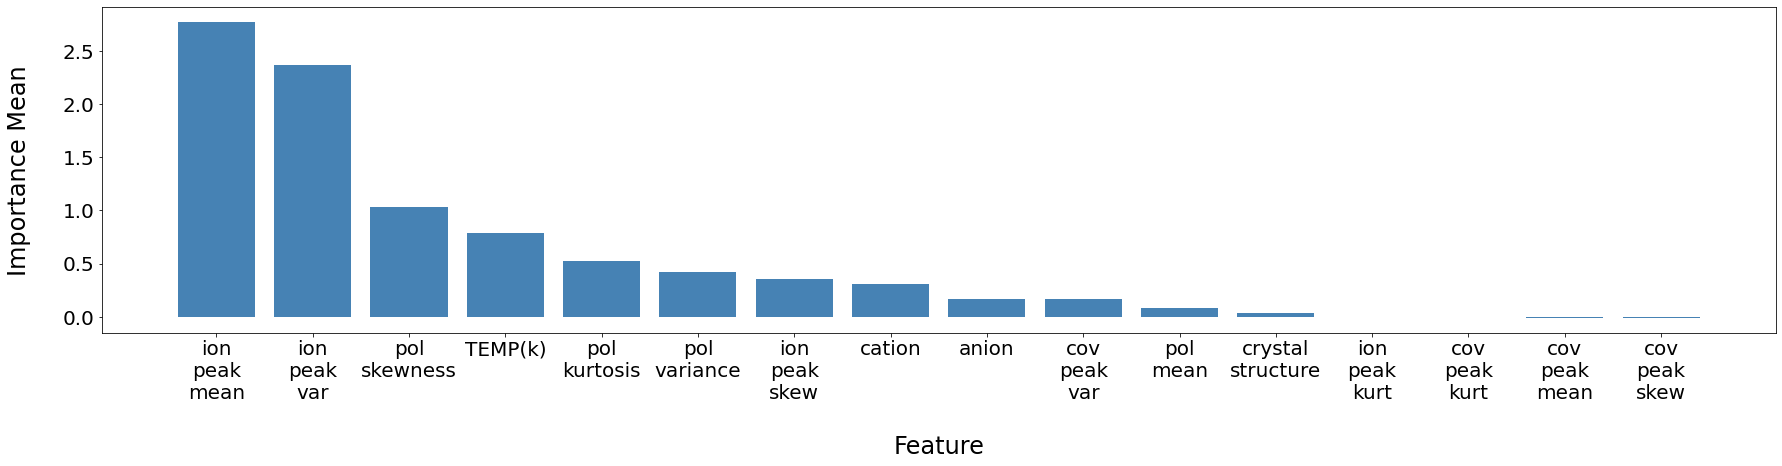

In [14]:
#diffusion
print('\t \t \t THIS HAS CORRELATED FEATURES FOR DIFFUSION REMOVED \n')
perm_importance(correl_df,main_features_D,main_target_D,(30,6),
                rand_state=142, t_size=0.2)

In [15]:
#diffusion
#des_tree(converted_combined_df,combined_main_data,combined_main_target,
#         title_name= 'Combined Diffusion Coefficient Decision Tree',max_depth = 6, fig_size = (50,30)) 

### Combined Ea

In [16]:
correl_notemp_df = correl_df.drop(columns = 'TEMP(k)').dropna(0)
main_data_Ea = correl_notemp_df.iloc[:,:-2] #get rid of temperature here
main_target_Ea = correl_notemp_df['Ea (eV)']


	 	 	 THIS HAS CORRELATED FEATURES OF EA REMOVED AND DIFFERENT RANDOM STATE 

model score (as $R^2$): -1.00481470816371
pol skewness 	 	 12.370 +/- 5.718
ion peak var 	 	 8.155 +/- 4.118
ion peak mean 	 	 5.933 +/- 2.674
ion peak skew 	 	 2.980 +/- 1.706
cov peak skew 	 	 1.725 +/- 1.125
cov peak var 	 	 1.302 +/- 0.841
cov peak kurt 	 	 0.519 +/- 1.092
pol variance 	 	 0.375 +/- 0.253
cov peak mean 	 	 0.311 +/- 0.881
pol mean 	 	 0.206 +/- 1.023
ion peak kurt 	 	 0.001 +/- 0.051
cation 	 	 -0.120 +/- 0.325
anion 	 	 -0.185 +/- 0.170
pol kurtosis 	 	 -0.362 +/- 0.611
crystal structure 	 	 -0.441 +/- 0.530


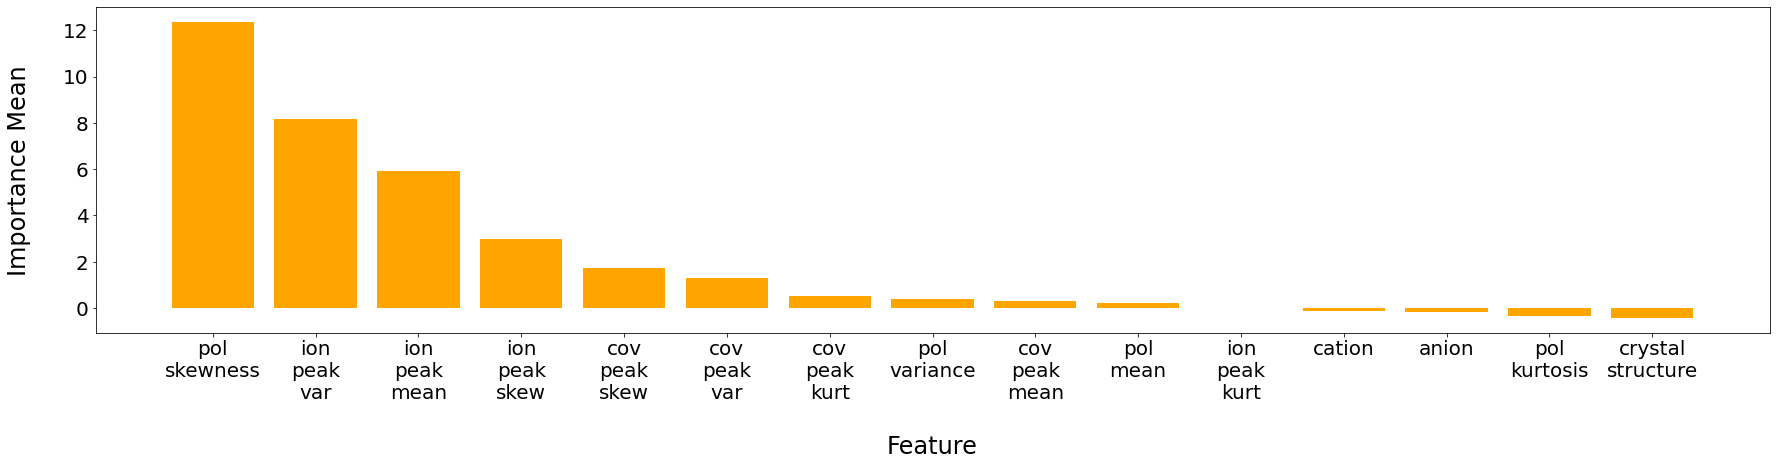

In [17]:
#Ea
print('\t \t \t THIS HAS CORRELATED FEATURES OF EA REMOVED AND DIFFERENT RANDOM STATE \n')
perm_importance(correl_notemp_df,main_data_Ea,main_target_Ea,(30,6), 
                rand_state = 42, t_size=0.1, col = 'orange')